# Image Representation
## Image as a matrix
- The simplest way to represent the image is in the form of a matrix.
- It is commonly seen that people use up to a byte to represnt every pixel of the image. This means that values between 0 to 255 represent the intensity for each pixel in the image where 0 is black and 255 is white. For every color channel in the image, one such matrix is generated

(-0.5, 712.5, 652.5, -0.5)

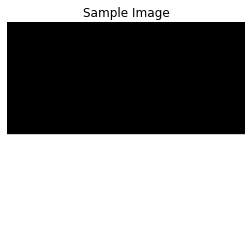

In [1]:
import cv2
import matplotlib.pyplot as plt
imgPath = "assets/Images/Image1.jpg"
img = cv2.imread(imgPath)
plt.imshow(img)
plt.title("Sample Image")
plt.axis('off')

In [2]:
print('Image Dimensions :', img.shape)

Image Dimensions : (653, 713, 3)


In [3]:
#Image as a matrix
print(img) 

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


<b>Note</b>: In this matrix,0 is denoted for Black and 255 is denoted for White. Although this is a B&W Image still the range of the matrix element is 0 to 255 because it is read as a normal (color) image.

## Image as a function
- An image can also be represented as a function. An image (grayscale) can be thought of as a function that takes in a pixel coordinate and gives the intensity at the pixel.
- It can be written as function $$f: R^{2} → R$$ that outputs the intensity at any input point (x,y). The value of intensity can be between 0 to 255 or 0 to 1 if values are normalized.

# Image Geometric/Spatial Transormation
- Image geometric means that changing the geometry of an image.
- Geometric transforms permit the elimination of geometric distortion that occurs when an image is captured.
- A spatial transormation of an image is a geometric transformation of the image coordinate system.
- In spatial transformation each pint (x,y) of image A is mapped to a point (u,v) in a new coordinate system.


> Application : 
 - Some person clicking the pictures of the same place at different times of the day and year to visualize the changes. Every time he clicks the picture, it's not necessary that he clicks the picture at the exact same angle. So for better visualiation, he can align all the images at the same angle using geometric transformation.
 - Image registration is the process of transforming different sets of data into one coordinate system.
 
## Types of Geometric Transformation
### 1. Translation
- Translation is the shifting of the object's location. If you know the shift in (x,y) direction, let it be you can create the transformation matrix as follows:
$$
\begin{aligned}
M & =\left[\begin{array}{lll}
1 & 0 & t_x \\
0 & 1 & t_y
\end{array}\right] \\\\
{\left[\begin{array}{l}
u \\
v
\end{array}\right] } & =\left[\begin{array}{lll}
1 & 0 & t_x \\
0 & 1 & t_y
\end{array}\right]\left[\begin{array}{l}
x \\
y
\end{array}\right]
\end{aligned}
$$

(-0.5, 299.5, 167.5, -0.5)

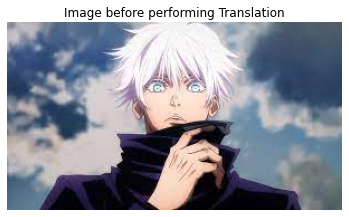

In [4]:
imgPath = "assets/Images/Image2.jpeg"
img = cv2.imread(imgPath)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title("Image before performing Translation")
plt.axis('off')

(-0.5, 299.5, 167.5, -0.5)

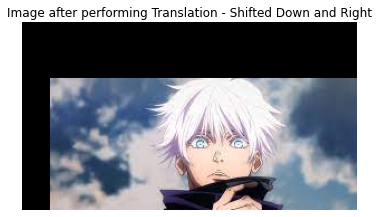

In [5]:
import numpy as np
M = np.float32([[1, 0, 25], [0, 1, 50]])
imgShifted = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
plt.imshow(imgShifted)
plt.title("Image after performing Translation - Shifted Down and Right")
plt.axis('off')

### 2. Rotation
- This technique rotates an image by a specified angle and by the given axis or point.
- The points that lie outside the boundary of an output image are ignored. Rotation about the origin by an angle $\theta$ is given by, 
$$
\begin{aligned}
& {\left[\begin{array}{l}
u \\
v
\end{array}\right] }=\left[\begin{array}{cc}
\cos \theta & -\sin \theta \\
\sin \theta & \cos \theta
\end{array}\right]\left[\begin{array}{l}
x \\
y
\end{array}\right] \\
& u=x \cos \theta+y \sin \theta \\
& v=-x \sin \theta+y \cos \theta
\end{aligned}
$$

(-0.5, 299.5, 167.5, -0.5)

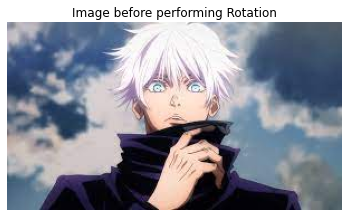

In [6]:
plt.imshow(img)
plt.title("Image before performing Rotation")
plt.axis('off')

In [7]:
h, w = img.shape[:2] #height (h) and width (w)
cX, cY = w / 2, h / 2
print("height = ", h)
print("width = ", w)
print("\nCenter x - coordinate = ", cX)
print("Center y - coordinate = ", cY)

height =  168
width =  300

Center x - coordinate =  150.0
Center y - coordinate =  84.0


Text(0.5, 1.0, 'Rotated by 45 Degrees')

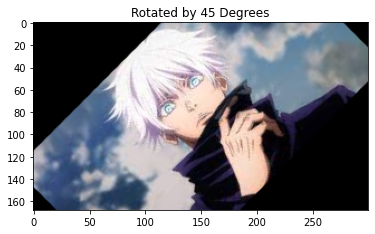

In [8]:
# rotate our image by 45 degrees around the center of the image
M = cv2.getRotationMatrix2D((cX, cY), 45, 1.0)
imgRotated = cv2.warpAffine(img, M, (w, h))
plt.imshow(imgRotated)
plt.title("Rotated by 45 Degrees")

(-0.5, 299.5, 167.5, -0.5)

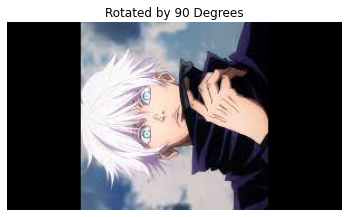

In [9]:
# rotate our image by 90 degrees around the center of the image
M = cv2.getRotationMatrix2D((cX, cY), 90, 1.0)
imgRotated = cv2.warpAffine(img, M, (w, h))
plt.imshow(imgRotated)
plt.title("Rotated by 90 Degrees")
plt.axis('off')

### 3. Scaling
- Scaling means resizing an image which means an image is made bigger or smaller in x/y direction.
- We can resize an image in terms of scaling factor.
$$
\left[\begin{array}{l}
u \\
v
\end{array}\right]=\left[\begin{array}{cc}
s_x & 0 \\
0 & s_y
\end{array}\right] \cdot\left[\begin{array}{l}
x \\
y
\end{array}\right]
$$

In [10]:
print(img.shape)

(168, 300, 3)


(-0.5, 149.5, 335.5, -0.5)

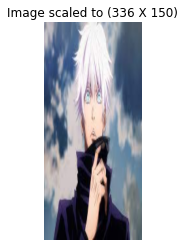

In [11]:
#We have an image of size (168 X 300). Let's transform it into an image of shape (336 X 150)
imgScale = cv2.resize(img, (150, 336))
plt.imshow(imgScale)
plt.title("Image scaled to (336 X 150)")
plt.axis('off')

(-0.5, 1499.5, 335.5, -0.5)

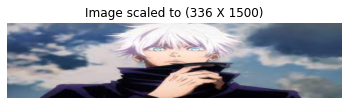

In [12]:
#We have an image of size (168 X 300). Let's transform it into an image of shape (336 X 1500)
imgScale = cv2.resize(img, (1500, 336))
plt.imshow(imgScale)
plt.title("Image scaled to (336 X 1500)")
plt.axis('off')

### 4. Shearing
- Sharing an image means shifting the pixel values either horizontally or vertically.
- Basically, this shifts some part of an image to one direction. Horizontal shearing will shift the upper part to the right and lower part to the left.

Text(0.5, 1.0, 'Image after Shearing')

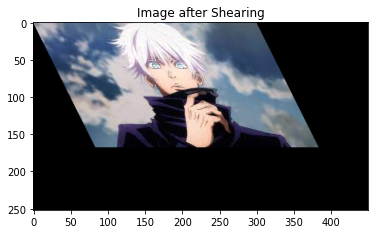

In [13]:
rows, cols = img.shape[:2]
M = np.float32([[1, 0.5, 0], [0, 1, 0], [0, 0, 1]])
imgSheared = cv2.warpPerspective(img, M,(int(cols*1.5), int(rows*1.5)))
plt.imshow(imgSheared)
plt.title("Image after Shearing")


* Rigid = Translations + Rotations
* Similarity = Translations + Rotations + Scale
* Affine Transformation = Translations + Rotations + Scale + Shear